In [38]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns; sns.set()
from math import sqrt,pi,exp
from scipy import stats
from scipy.stats.stats import pearsonr
import researchpy as rp

In [17]:
df = pd.read_excel('dataPierre/form.xlsx')

In [21]:

#print(df.columns)
df = df.drop(df.columns[[0]], axis=1)

In [22]:
df.head()

,Genre,AgeGroup,SituPro,WhereLive,Domicile,AllerMedecin,OuiRaison,NonRaison,SiNonSoigner,TempsAllerMedecin
0,Femme,17-21,Etudiant(e),Centre-Ville,Indépendant,Oui si situation extrême,"Symptômes inquiétants, Suivi d'une maladie","Coût de la visite, Flemmardise, Manque de temps","Je contacte mes proches pour conseils, Je pren...",Rarement
1,Femme,17-21,Etudiant(e),Centre-Ville,Familial (foyer principal),Oui,"Simple check up, Symptômes inquiétants, Suivi ...",Manque de temps,"Je contacte mes proches pour conseils, Je pren...",Jamais
2,Femme,22-25,Jeune professionel(le),Centre-Ville,Indépendant,Oui,Symptômes inquiétants,NaN,Je prends les medicaments qui me semblent adéq...,De temps en temps
3,Femme,40 - 60,Cadre,Province,Familial (foyer principal),Oui,Suivi d'une maladie,NaN,NaN,Régulièrement
4,Femme,17-21,Etudiant(e),Centre-Ville,Indépendant,Oui si situation extrême,Symptômes inquiétants,Coût de la visite,Je contacte mes proches pour conseils,De temps en temps


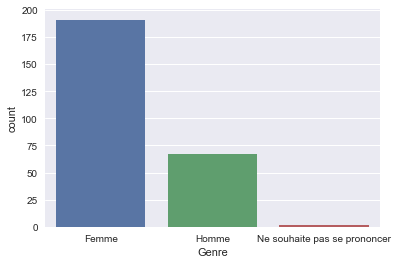

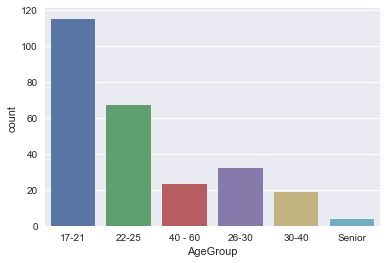

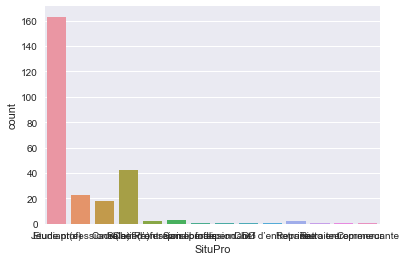

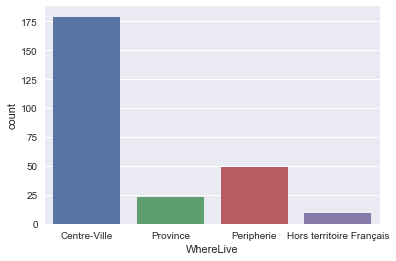

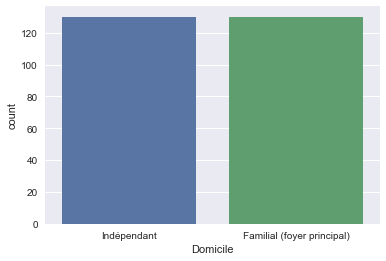

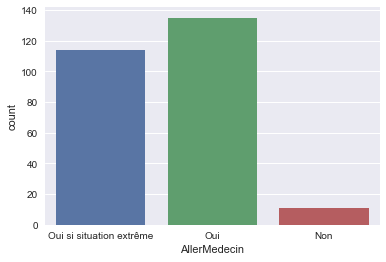

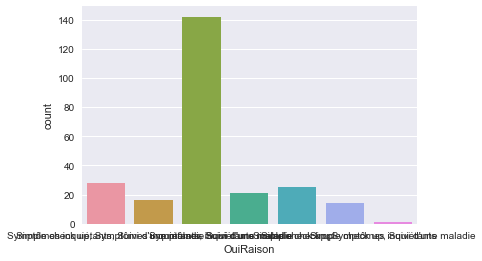

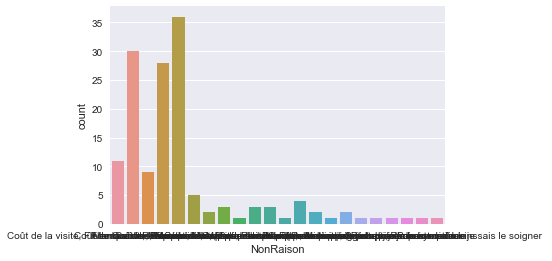

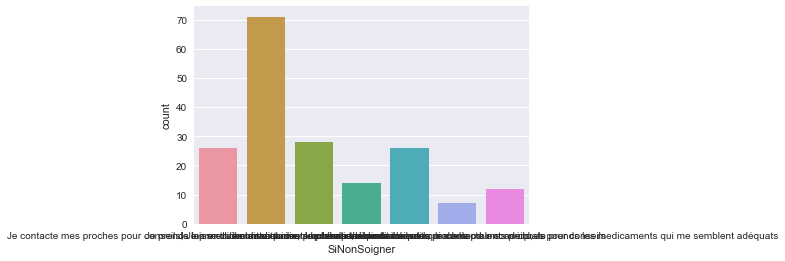

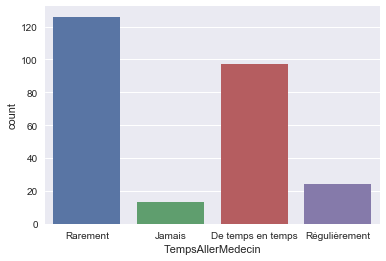

In [23]:
for column in df : 
    
    sns.countplot(df[column]) 
    plt.show()

In [18]:
df.SituPro.value_counts()>1

Etudiant(e)                True
Salarié(e)                 True
Jeune professionel(le)     True
Cadre                      True
Profession libérale        True
Chef d’entreprise          True
Retraitée                  True
Chef d’entreprise         False
DG                        False
Sans profession           False
Retraitee                 False
auto entrepreneur         False
Indépendant               False
Commercante               False
Name: SituPro, dtype: bool

In [31]:
contingency_table_genre_allermedecin = pd.crosstab(df['Genre'], df['AllerMedecin'],  margins = True)

In [32]:
stats.chi2_contingency(contingency_table_genre_allermedecin)

(9.92888925114817,
 0.3562726856583547,
 9,
 array([[8.08076923e+00, 9.91730769e+01, 8.37461538e+01, 1.91000000e+02],
        [2.83461538e+00, 3.47884615e+01, 2.93769231e+01, 6.70000000e+01],
        [8.46153846e-02, 1.03846154e+00, 8.76923077e-01, 2.00000000e+00],
        [1.10000000e+01, 1.35000000e+02, 1.14000000e+02, 2.60000000e+02]]))

In [36]:
chi2 = stats.chi2_contingency(contingency_table_genre_allermedecin)[0]
p = stats.chi2_contingency(contingency_table_genre_allermedecin)[1]


In [39]:
tableGAM, resultsGAM = rp.crosstab(df['Genre'], df['AllerMedecin'], prop= 'col', test= 'chi-square')

In [40]:
resultsGAM

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,9.9289
1,p-value =,0.0416
2,Cramer's V =,0.1382


In [ ]:
tableGTAM, resultsGTAM = rp.crosstab(df['Genre'], df['TempsAllerMedecin'], prop= 'col', test= 'chi-square')

In [42]:
resultsGTAM

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,7.2276
1,p-value =,0.3003
2,Cramer's V =,0.1179


In [43]:
tableSPAM, resultsSPAM = rp.crosstab(df['SituPro'], df['AllerMedecin'], prop= 'col', test= 'chi-square')

In [44]:
resultsSPAM

,Chi-square test,results
0,Pearson Chi-square ( 26.0) =,23.4551
1,p-value =,0.6071
2,Cramer's V =,0.2124


In [45]:
tableSPTAM, resultsSPTAM = rp.crosstab(df['SituPro'], df['TempsAllerMedecin'], prop= 'col', test= 'chi-square')

In [46]:
resultsSPTAM

,Chi-square test,results
0,Pearson Chi-square ( 39.0) =,37.2276
1,p-value =,0.5509
2,Cramer's V =,0.2185


On remarque que la présence de trop nombreux choix ne permet pas de prouver une relation forte

In [47]:
tableWLAM, resultsWLAM = rp.crosstab(df['WhereLive'], df['AllerMedecin'], prop= 'col', test= 'chi-square')

In [48]:
resultsWLAM

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,2.4339
1,p-value =,0.8758
2,Cramer's V =,0.0684


In [49]:
tableWLTAM, resultsWLTAM = rp.crosstab(df['WhereLive'], df['TempsAllerMedecin'], prop= 'col', test= 'chi-square')

In [50]:
resultsWLTAM

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,18.2720
1,p-value =,0.0321
2,Cramer's V =,0.1531


In [51]:
tableDAM, resultsDAM = rp.crosstab(df['Domicile'], df['AllerMedecin'], prop= 'col', test= 'chi-square')

In [52]:
resultsDAM

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,6.6661
1,p-value =,0.0357
2,Cramer's V =,0.1601


In [53]:
tableDTAM, resultsDTAM = rp.crosstab(df['Domicile'], df['TempsAllerMedecin'], prop= 'col', test= 'chi-square')

In [54]:
resultsDTAM

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,2.5708
1,p-value =,0.4626
2,Cramer's V =,0.0994
